In [1]:
from ROOT import TFile

Welcome to JupyROOT 6.24/06


In [10]:
f_pog = TFile.Open("2017/Electron/efficiency_POG.root")
f_rep = TFile.Open("HcToWAElectron/2017_MVANoIsoWP90/efficiency.root")

h_pog = f_pog.Get("EGamma_EffData2D"); h_pog.SetDirectory(0)
h_rep = f_rep.Get("data"); h_rep.SetDirectory(0)

f_pog.Close(); f_rep.Close()

In [11]:
eta_bins = [-2.5, -2., -1.566, -1.444, -0.8, 0., 0.8, 1.444, 1.566, 2., 2.5]
pt_bins = [10, 20, 35, 50, 100, 500]
eta_bins = [eta+0.0001 for eta in eta_bins]
pt_bins = [pt+0.0001 for pt in pt_bins]

from itertools import product
for eta, pt in product(eta_bins, pt_bins):
    pog_bin = h_pog.FindBin(eta, pt)
    rep_bin = h_rep.FindBin(eta, pt)
    pog = h_pog.GetBinContent(pog_bin); err = h_pog.GetBinError(pog_bin)
    rep = h_rep.GetBinContent(rep_bin)
    try:
        print(f"[{eta}/{pt}, {rep_bin}]", f"{pog:.3f}", f"{rep:.3f}", f"{(abs(rep-pog)/err):.2f}")
    except Exception as e:
        print(e)
        continue

[-2.4999/10.0001, 13] 0.798 0.805 0.58
[-2.4999/20.0001, 25] 0.831 0.832 0.05
[-2.4999/35.0001, 37] 0.886 0.886 0.00
[-2.4999/50.0001, 49] 0.892 0.902 1.14
[-2.4999/100.0001, 61] 0.883 0.874 0.47
float division by zero
[-1.9999/10.0001, 14] 0.819 0.865 1.66
[-1.9999/20.0001, 26] 0.844 0.853 1.67
[-1.9999/35.0001, 38] 0.907 0.908 0.35
[-1.9999/50.0001, 50] 0.931 0.936 1.24
[-1.9999/100.0001, 62] 0.945 0.936 0.56
float division by zero
[-1.5659/10.0001, 15] 1.000 0.850 0.15
[-1.5659/20.0001, 27] 1.000 0.805 0.19
[-1.5659/35.0001, 39] 1.000 0.875 0.12
[-1.5659/50.0001, 51] 1.000 0.884 0.12
[-1.5659/100.0001, 63] 1.000 0.900 0.10
float division by zero
[-1.4439/10.0001, 16] 0.809 0.811 0.11
[-1.4439/20.0001, 28] 0.829 0.826 0.29
[-1.4439/35.0001, 40] 0.881 0.880 0.50
[-1.4439/50.0001, 52] 0.891 0.891 0.10
[-1.4439/100.0001, 64] 0.910 0.905 0.61
float division by zero
[-0.7999/10.0001, 17] 0.795 0.797 0.11
[-0.7999/20.0001, 29] 0.832 0.836 0.46
[-0.7999/35.0001, 41] 0.886 0.885 0.24
[-0.799

Warning in <TH2D::Divide>: Dividing histograms with different bin limits


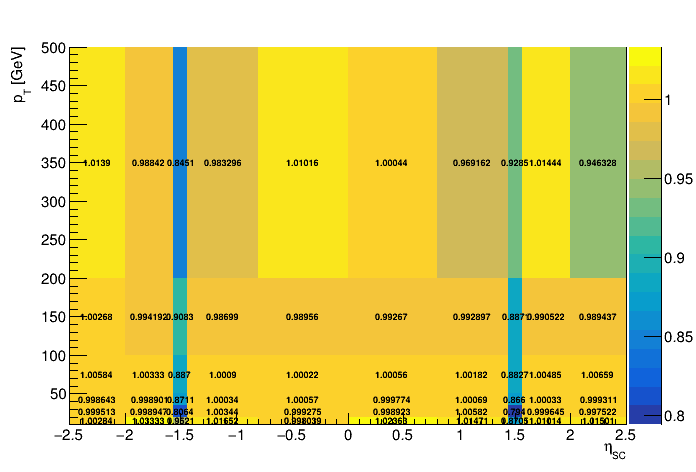

In [4]:
h_ratio = h_rep.Clone("ratio")
h_ratio.Divide(h_pog)

from ROOT import TCanvas
c = TCanvas()
c.cd()
h_ratio.Draw()
c.Draw()